In [1]:
from pathlib import Path
TRI_DIR = Path('../CatDogDataSet/annotations/trimaps')
IMG_DIR = Path('../CatDogDataSet/images')
BASE_DIR = Path('.')
tri_img = [x for x in TRI_DIR.iterdir() if TRI_DIR.is_dir()]
train_img = [x for x in IMG_DIR.iterdir() if IMG_DIR.is_dir()]
test_img = [x for x in tri_img if '._' not in str(x)]
print(train_img[150])
print(test_img[150])

..\CatDogDataSet\images\Abyssinian_49.jpg
..\CatDogDataSet\annotations\trimaps\Abyssinian_51.png


In [97]:
import cv2
import numpy as np

datamat = np.ndarray((4,128,128))
coord = 10
im = cv2.imread(str(train_img[150]), cv2.IMREAD_COLOR)
im = cv2.resize(im, (128, 128), interpolation=cv2.INTER_CUBIC)
im2 = Image.open(test_img[150])
im2 = np.asarray(im2,dtype=np.uint8)
print(im2.shape)
im2 = cv2.resize(im2, (128, 128), interpolation=cv2.INTER_CUBIC)

print(im2.shape)
# When you take the transpose it is now RGB, Column, Row.
data = im2.ravel()
for i in range(4):
    datamat[i] = im2
print(datamat.shape)
datamat = datamat.reshape(4*128**2)
datamat = datamat[0:16384]
print(datamat.shape)
print(im2[coord])
print(data.shape)
data = datamat.reshape(128,128)
print(data[coord])

(597, 728)
(128, 128)
(4, 128, 128)
(16384,)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(16384,)
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.
  3.  3.  1.  1.  1.  1.  1.  3.  3.  3.  3.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.]


<PIL.Image.Image image mode=L size=600x400 at 0x25BFC495D30>
None (600, 400) F
Matrix Dimensions: (700, 700)
Type Pix: <class 'PixelAccess'>
PixelArray: <PixelAccess object at 0x0000025BFC3E6110>
<class 'numpy.ndarray'>
0


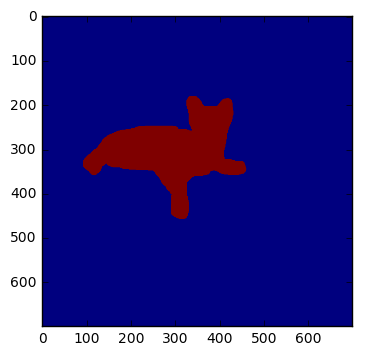

In [16]:
from PIL import Image
import numpy as np

# Pixel Annotations: 1: Foreground 2:Background 3: Not classified

size = 700
img = Image.open(test_img[0])

img_y, img_b, img_r = img.convert('YCbCr').split()
print(img_y)

img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))
# img.show()
n_x, n_y = img.size

if n_y > n_x:
    n_y_new = size
    n_x_new = round(size * n_x / n_y)
else:
    n_x_new = size
    n_y_new = round(size * n_y / n_x)
img_np = np.asarray(img).astype(float)
img_np = np.abs(img_np - 2)
img = Image.fromarray(img_np)

print(img.format, img.size, img.mode)
img_pad = Image.new('L', (size,size), 0)
ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
img_pad.paste(img, ulc)
img_mat = np.asarray(img_pad, dtype=np.uint8)
print("Matrix Dimensions:", img_mat.shape)
pix = img_pad.load()
print("Type Pix:", type(pix))
pixarray = np.asarray(pix)
print("PixelArray:", pixarray)
print(type(pixarray))
# for x in range(200):
#     for y in range(600):
#         pix[x, y] = 0
# pix[200, 600] = 2
print(pix[600, 400])
# img_change[10:100, 10:100] = 4
# pixarray1 = Image.fromarray(pixarray, 'L')
plt.imshow(img_pad)
plt.show()
# img_pad.save('TEST.png')

In [10]:
import matplotlib.pyplot as plt
from scipy.misc import imread

tri = imread(train_img[0])
# print(tri)
# It looks like it treats it as row, column, rather than x, y.
print(tri[200, 300])
plt.imshow(tri)
plt.show()
print("Hello")

[112  85  58]


In [23]:
# Pixel Annotations: 1: Foreground 2:Background 3: Not classified

size = 700
img = Image.open(train_img[0])

img_y, img_b, img_r = img.convert('YCbCr').split()
print(img_y)

img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))
# img.show()
n_x, n_y = img.size
print(img.format, img.size, img.mode)
img_pad = Image.new('RGB', (size, size), (128, 128, 128))
ulc = ((size - n_x) // 2, (size - n_y) // 2)
img_pad.paste(img, ulc)
pix = img.load()
print("Type Pix:", type(pix))
pixarray = np.asarray(pix)
print("PixelArray:", pixarray)
# print(type(pixarray))
# for x in range(200):
#     for y in range(600):
#         pix[x, y] = 0
# pix[200, 600] = 2
# print(pix[10, 10])
# img_change[10:100, 10:100] = 4
# pixarray1 = Image.fromarray(pixarray, 'L')
plt.imshow(img_pad)
plt.show()
# img_pad.save('TEST.png')

<PIL.Image.Image image mode=L size=600x400 at 0x25BFBF203C8>
JPEG (600, 400) RGB
Type Pix: <class 'PixelAccess'>
PixelArray: <PixelAccess object at 0x0000025BFBEBBDD0>


In [53]:
data = np.asarray(img, dtype="int32")
print(type(data))
print(data[2, 0])
print(data.shape)
# How to reshape a dataMatrix into a Vector.
dataVector = data.reshape(-1)
mMat = data.reshape(400*600, 3)
print(mMat[1200])
print(mMat.shape)

# This will randomly get indexes to reduce the size by 100.
randArray = np.random.choice(data.size, data.size // 100)
print(randArray.shape)
print(data.shape)
print(dataVector.shape)

<class 'numpy.ndarray'>
[29 37 26]
(400, 600, 3)
[29 37 26]
(240000, 3)
(7200,)
(400, 600, 3)
(720000,)


In [13]:
l = [10,12,14,16,18,20]
l1 = np.add(range(4),1)
l2 = zip(l, l1)
print(l2)
for i in l2:
    print(i)

(10, 1)
(12, 2)
(14, 3)
(16, 4)


In [106]:
TRI_DIR = Path('../CatDogDataSet/test_images')
test_img = [x for x in TRI_DIR.iterdir() if TRI_DIR.is_dir() and '.jpg' in str(x).lower()]
# test_img  = [x for x in test_img if '.jpg' in str(x).lower()]
print(test_img)

[WindowsPath('../CatDogDataSet/test_images/1.jpg'), WindowsPath('../CatDogDataSet/test_images/10.jpg'), WindowsPath('../CatDogDataSet/test_images/11.jpg'), WindowsPath('../CatDogDataSet/test_images/12.jpg'), WindowsPath('../CatDogDataSet/test_images/13.jpg'), WindowsPath('../CatDogDataSet/test_images/14.jpg'), WindowsPath('../CatDogDataSet/test_images/15.jpg'), WindowsPath('../CatDogDataSet/test_images/16.jpg'), WindowsPath('../CatDogDataSet/test_images/17.jpg'), WindowsPath('../CatDogDataSet/test_images/18.jpg'), WindowsPath('../CatDogDataSet/test_images/19.jpg'), WindowsPath('../CatDogDataSet/test_images/2.jpg'), WindowsPath('../CatDogDataSet/test_images/20.jpg'), WindowsPath('../CatDogDataSet/test_images/21.jpg'), WindowsPath('../CatDogDataSet/test_images/22.jpg'), WindowsPath('../CatDogDataSet/test_images/23.jpg'), WindowsPath('../CatDogDataSet/test_images/24.jpg'), WindowsPath('../CatDogDataSet/test_images/25.jpg'), WindowsPath('../CatDogDataSet/test_images/26.jpg'), WindowsPath('